In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
Airlines = pd.read_csv("D:/Data Science- Assignments folder/Clustering/EastWestAirlines.csv")
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
Airlines1=Airlines.drop(['ID#'],axis=1)

In [5]:
Airlines1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [6]:
# Scaling the data using Min-Max Scalar

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit(Airlines1)

In [7]:
scaled_data

StandardScaler()

In [8]:
scaled_data=scaler.transform(Airlines1)
scaled_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [9]:
# HIERARCHICAL CLUSTERING or Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

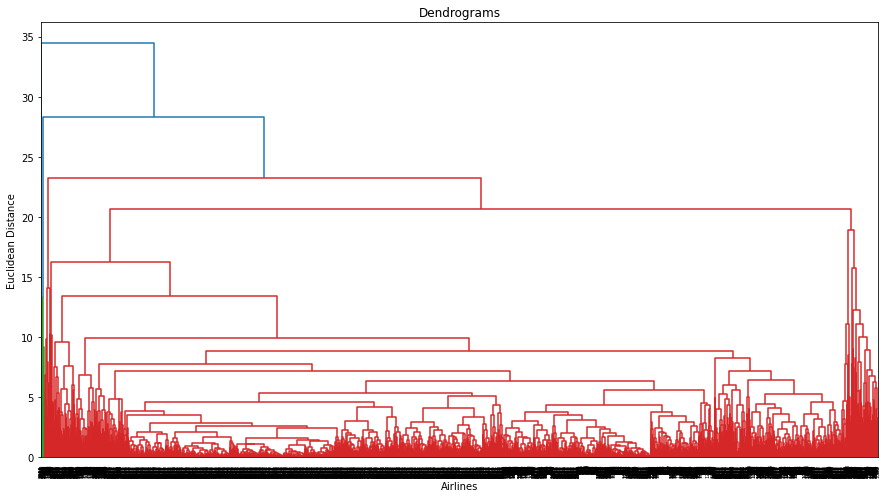

In [10]:
plt.figure(figsize=(15,8))  
plt.title("Dendrograms") 
plt.xlabel("Airlines")
plt.ylabel("Euclidean Distance")
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='complete'))

In [11]:
# Model initialization using Agglomarative Clustering method:-

clustering_model=AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [12]:
clustering_predictionHRC=clustering_model.fit_predict(scaled_data)
clustering_predictionHRC

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
from sklearn import metrics
SilhouetteSCHRC=metrics.silhouette_score(scaled_data, clustering_predictionHRC , metric='euclidean')
SilhouetteSCHRC

0.7700180807329777

In [14]:
# Forming Dataframe for Cluster Numbers
HRC_Clusters=pd.DataFrame(clustering_predictionHRC,columns=['HRCClusters'])

In [15]:
Airlines['HRC_Clusters']=clustering_predictionHRC

In [16]:
Airlines['HRC_Clusters']=Airlines['HRC_Clusters'].replace(0,'HRC 1')
Airlines['HRC_Clusters']=Airlines['HRC_Clusters'].replace(1,'HRC 2')
Airlines['HRC_Clusters']=Airlines['HRC_Clusters'].replace(2,'HRC 3')
Airlines['HRC_Clusters']=Airlines['HRC_Clusters'].replace(3,'HRC 4')
Airlines['HRC_Clusters']=Airlines['HRC_Clusters'].replace(4,'HRC 5')
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,HRC_Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,HRC 1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,HRC 1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,HRC 1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,HRC 1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,HRC 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,HRC 1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,HRC 1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,HRC 1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,HRC 1


In [17]:
# K-MEANS CLUSTERING

from sklearn.cluster import KMeans

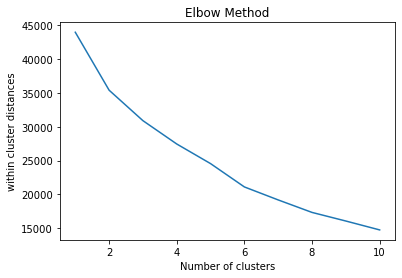

In [18]:
wcss = [] #wcss=within cluster distances i.e within cluster sum of squares
for i in range (1,11):
    kmeans= KMeans(n_clusters=i,random_state=0) #initializing K-Means Clustering 
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_) #kmeans.inertia_ = within cluster distances
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('within cluster distances')
plt.show()

In [19]:
# Building new k-means cluster algorithm taking value of k=4
k_newclusters= KMeans(4,random_state=0)
k_newclusters.fit(scaled_data)

KMeans(n_clusters=4, random_state=0)

In [20]:
k_newclusters.labels_ 
# This gives array of clusternumbers

array([1, 1, 1, ..., 0, 1, 1])

In [21]:
metrics.silhouette_score(scaled_data, k_newclusters.labels_,metric='euclidean')

0.32563311512799126

In [22]:
Airlines['kmeans_cluster']=k_newclusters.labels_

In [23]:
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,HRC_Clusters,kmeans_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,HRC 1,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,HRC 1,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,HRC 1,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,HRC 1,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,HRC 1,0


In [24]:
Airlines['kmeans_cluster']=Airlines['kmeans_cluster'].replace(0,'KMC 1')
Airlines['kmeans_cluster']=Airlines['kmeans_cluster'].replace(1,'KMC 2')
Airlines['kmeans_cluster']=Airlines['kmeans_cluster'].replace(2,'KMC 3')
Airlines['kmeans_cluster']=Airlines['kmeans_cluster'].replace(3,'KMC 4')
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,HRC_Clusters,kmeans_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,HRC 1,KMC 2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,HRC 1,KMC 2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,HRC 1,KMC 2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,HRC 1,KMC 2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,HRC 1,KMC 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,HRC 1,KMC 2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,HRC 1,KMC 2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,HRC 1,KMC 1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,HRC 1,KMC 2


In [25]:
Airlines['kmeans_cluster'].value_counts()

KMC 2    2538
KMC 1    1262
KMC 3     156
KMC 4      43
Name: kmeans_cluster, dtype: int64

## DBSCAN

In [26]:
from sklearn.cluster import DBSCAN

In [27]:
# Intializing DBSCAN
clustering_model=DBSCAN(eps=0.9,min_samples=5)

In [28]:
# Fitting the model 
clustering_model.fit(scaled_data)

DBSCAN(eps=0.9)

In [29]:
# Predicting labels by DBSCAN
predicted_labels=clustering_model.labels_
predicted_labels

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [30]:
metrics.silhouette_score(scaled_data, predicted_labels,metric='euclidean')

0.18814761430547208

In [31]:
Airlines['DBSCAN_cluster']=predicted_labels
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,HRC_Clusters,kmeans_cluster,DBSCAN_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,HRC 1,KMC 2,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,HRC 1,KMC 2,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,HRC 1,KMC 2,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,HRC 1,KMC 2,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,HRC 1,KMC 1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,HRC 1,KMC 2,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,HRC 1,KMC 2,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,HRC 1,KMC 1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,HRC 1,KMC 2,0


In [32]:
Airlines['DBSCAN_cluster'].value_counts()

 0    2273
 1    1033
-1     657
 3      13
 5       8
 2       5
 4       5
 6       5
Name: DBSCAN_cluster, dtype: int64